## Manually Combining Over and Under Sampling Techniques

- We will try to manually combine over and under sampling techniques and check if the new resampled data can give better performance to our model

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline

In [9]:
# get data

data = pd.read_csv('kdd2004.csv').sample(50000, random_state=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
46233,51.02,22.08,0.92,31.5,10.5,1910.7,-1.47,-0.74,-8.0,-52.0,...,879.5,1.58,-0.45,-5.0,-30.0,291.7,-0.12,0.47,0.96,-1
58625,64.17,24.60,-0.21,-35.5,26.0,4585.3,-1.10,1.17,-27.5,-121.5,...,4815.7,-1.09,5.09,25.0,-220.0,475.4,2.32,0.42,0.46,-1
5231,86.09,29.63,3.24,78.5,-89.0,453.2,1.87,4.58,63.0,-119.5,...,144.9,1.25,2.50,3.0,-24.0,64.8,-0.85,0.59,0.94,1
58042,78.57,21.37,0.36,-7.0,38.5,1779.1,-0.25,-0.03,-3.5,-62.5,...,1471.3,-0.12,1.48,-5.0,-62.0,406.9,0.18,0.41,0.68,-1
128067,79.13,24.18,0.78,-3.0,-16.0,844.1,0.48,-0.56,-6.5,-52.0,...,633.8,0.43,1.30,5.0,-29.0,165.0,-0.10,0.09,-0.41,-1


In [10]:
data.target.value_counts()

-1    49528
 1      472
Name: target, dtype: int64

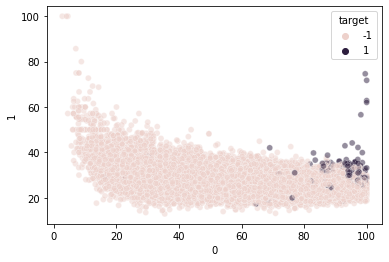

In [11]:
# plotting columns 0 and 1 of the original data

sns.scatterplot(data = data, x = '0', y = '1', hue = data['target'], alpha = 0.5)
plt.show()

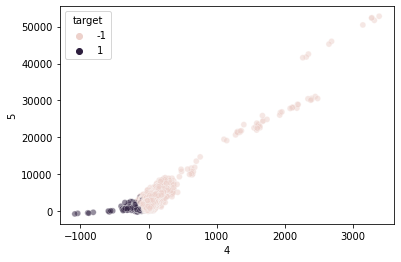

In [12]:
# plotting columns 0 and 1 of the original data

sns.scatterplot(data = data, x = '4', y = '5', hue = data['target'], alpha = 0.5)
plt.show()

In [13]:
# split into train and test data

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),
                                                   data['target'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, y_train.shape

((35000, 74), (35000,))

In [14]:
# initialize our under and over sampling objects

ada = ADASYN(sampling_strategy='auto',
             n_neighbors=5,
             n_jobs=2,
             random_state=0)


# The sampling strategy needs to be set to all, or with
# a specific dictionary, because after ADASYN, our
# previous minority class is no longer minority!!
ncr = NeighbourhoodCleaningRule(sampling_strategy='all',
                                n_neighbors=3,
                                kind_sel='mode',
                                threshold_cleaning=0.1) # the threshold to evaluate a class for cleaning (used only for clearning step)

In [16]:
# initialize the scaler object and the Random Forest Classifier
scaler = MinMaxScaler()

rf = RandomForestClassifier(n_estimators=100,n_jobs=2,max_depth=3,random_state=39)

In [17]:
# create pipeline to run the model
model = make_pipeline(scaler,
                      ada,
                      ncr,
                      rf
                     )

In [18]:
# fitting the pipeline to our dataset
model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adasyn', ADASYN(n_jobs=2, random_state=0)),
                ('neighbourhoodcleaningrule',
                 NeighbourhoodCleaningRule(kind_sel='mode',
                                           sampling_strategy='all',
                                           threshold_cleaning=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, n_jobs=2,
                                        random_state=39))])

In [19]:
pred_train = model.predict_proba(X_train)[:,1]
pred_test = model.predict_proba(X_test)[:,1]

In [20]:
print('roc score for training set : {}'.format(roc_auc_score(y_train, pred_train)))

roc score for training set : 0.9917936513257711


In [21]:
print('roc score for training set : {}'.format(roc_auc_score(y_test, pred_test)))

roc score for training set : 0.9891783766984125
